In [ ]:
#my modules
import os
os.chdir("..")

from bass_lv_v2 import SVBassLV
from heston import Heston, implied_vol
from utils import Density, mc_iv, bs_call_price
from reference_models import BrownianMotion_R
from plot import plot_bass_result

#modules
from math import *
import numpy as np
import matplotlib.pyplot as plt

### Create a sample market model

In [2]:
#create the market marginals as an objects with functions from Heston model
model = Heston(s0 = 100, v0 = 0.1, kappa = 2, theta = 0.07, xi = 1, rho = -0.7)
T = [0.25, 0.7, 1]
market_marginal_1 = Density(model.cdf_interpolate(0.25), model.quantile_interpolate(0.25))
market_marginal_2 = Density(model.cdf_interpolate(0.7), model.quantile_interpolate(0.7))
market_marginal_3 = Density(model.cdf_interpolate(1), model.quantile_interpolate(1))

In [5]:
#Create a reference model, which is a Brownian motion in our case
marginals = {0.25: market_marginal_1, 0.7: market_marginal_2, 1: market_marginal_3}
sv_model = BrownianMotion_R(100, 1)
bass = SVBassLV(100, sv_model, marginals)

#calibration example for the Heston market marginals
bass.calibrate(tolerance = 0.001, max_iter = 100, N = 10_000, nsigma = 5)

first BM is constructed
next interval with delta: 0.44999999999999996
bounds are: (array(11.58509573), array(185.06045466))
iter: 0, error: 0.049118444316525345
iter: 1, error: 0.013996646730540685
iter: 2, error: 0.0060458198264455865
iter: 3, error: 0.0027350708757705178
iter: 4, error: 0.0012774554995996779
Brenier map for maturity 0.7 is constructed error = 0.000617741663929805
next interval with delta: 0.30000000000000004
bounds are: (array(6.73727322), array(201.20321195))
iter: 0, error: 0.06591453133223402
iter: 1, error: 0.04012060907601278
iter: 2, error: 0.025339620948824026
iter: 3, error: 0.016879742522535324
iter: 4, error: 0.011697026096782137
iter: 5, error: 0.008327479770477764
iter: 6, error: 0.00604072891715246
iter: 7, error: 0.004441300359063094
iter: 8, error: 0.0032973244885075026
iter: 9, error: 0.0024659946150927814
iter: 10, error: 0.0018547322846907965
iter: 11, error: 0.0014014779546843714
iter: 12, error: 0.0010627809452857795
Brenier map for maturity 1.0 i

In [14]:
#Simulation of contineous paths
final_paths, xi_paths = bass.simulate_paths(10000, 100)

steps split between maturities = [25, 45, 30]
time interval = 0.25
time interval = 0.44999999999999996
time interval = 0.30000000000000004


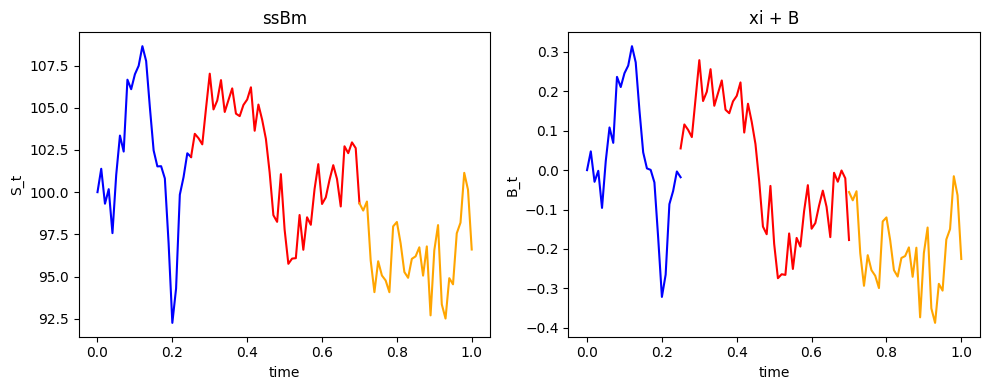

In [ ]:
#Plotting
T = [0.25, 0.7, 1]
# Create sample data
x1 = np.linspace(0, T[0], len(xi_paths[0][0]))
x2 = np.linspace(T[0], T[1], len(xi_paths[1][0]))
x3 = np.linspace(T[1], T[2], len(xi_paths[2][0]))

# Create a figure and a set of subplots.
# The '1, 2' argument means 1 row and 2 columns of subplots.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plot on the first subplot (ax1)
ax1.plot(x1, final_paths[0][0], color='blue')
ax1.plot(x2, final_paths[1][0], color='red')
ax1.plot(x3, final_paths[2][0], color='orange')
ax1.set_title('ssBm')
ax1.set_xlabel('time')
ax1.set_ylabel('S_t')

# Plot on the second subplot (ax2)
ax2.plot(x1, xi_paths[0][0], color='blue')
ax2.plot(x2, xi_paths[1][0], color='red')
ax2.plot(x3, xi_paths[2][0], color='orange')
ax2.set_title('xi + B')
ax2.set_xlabel('time')
ax2.set_ylabel('B_t')

# Adjust layout to prevent titles and labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()